<a href="https://colab.research.google.com/github/rodrigorhp/Machine-Learning-Analysis/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar librerías

In [ ]:
import pandas as pd
import numpy as np 
from sklearn import metrics

# Dataset

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target
X = iris.data
df.sample(4)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
11,4.8,3.4,1.6,0.2,0
125,7.2,3.2,6.0,1.8,2
54,6.5,2.8,4.6,1.5,1
92,5.8,2.6,4.0,1.2,1


In [ ]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [ ]:
df.shape

(150, 5)

In [ ]:
df['target'].unique()

array([0, 1, 2])

# Preparación de datos

Se dividen los datos en sets de entramiento y prueba con un 80% y 20% respectivamente de toda la base de datos, esto con el objetivo de tener la mayor cantidad de datos para entramiento, evitando underfitting, sin dejar muy pocos para la prueba de rendimiento del modelo.

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['target'], axis = 1) 
y = df['target']   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


# Implementación del Modelo

El modelo a implementar fue un Decision Tree mediante la librería Scikit Learn.

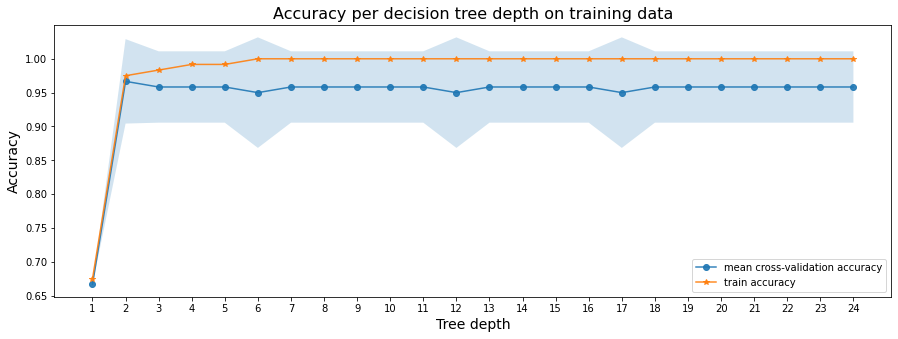

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

 La gráfica nos indica el rendimeinto del decsion tree con muchas profunidades, esto nos ayuda a decidir la profundidad del modelo para alzanzar un resultado óptimo sin desperdiciar costo computacional. 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import tree

clf = DecisionTreeClassifier(max_depth = 5,random_state=0)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

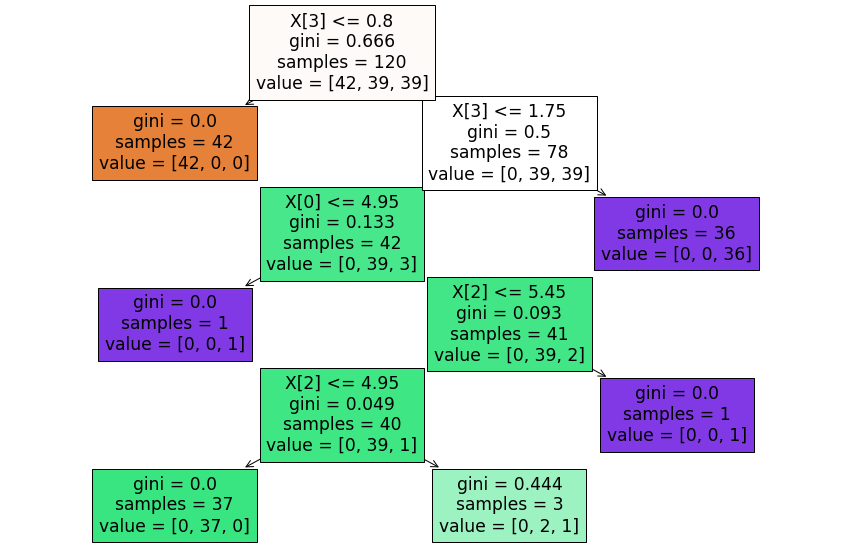

In [ ]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clf,   
                   filled=True)

# Métricas de Rendimiento

Se utilizaron métricas como accuracy, recall, f1-score y support para determinar el rendimiento del modelo. 

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

Accuracy: 0.9
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.90      0.82      0.86        11
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9


El modelo cumple con estandares aceptables para ser un buen modelo. 
- Mantiene una accuracy de 90%
- Recall del 100%
- F1-Score del 100%


In [ ]:
y_test=y_test.to_list()

In [ ]:
for i in range(len(y_test)):
  print('Predicción: ', y_pred[i], ' | Valor Esperado: ', y_test[i])

Predicción:  1  | Valor Esperado:  1
Predicción:  2  | Valor Esperado:  2
Predicción:  2  | Valor Esperado:  2
Predicción:  0  | Valor Esperado:  0
Predicción:  2  | Valor Esperado:  2
Predicción:  2  | Valor Esperado:  1
Predicción:  0  | Valor Esperado:  0
Predicción:  2  | Valor Esperado:  1
Predicción:  0  | Valor Esperado:  0
Predicción:  1  | Valor Esperado:  1
Predicción:  1  | Valor Esperado:  1
Predicción:  1  | Valor Esperado:  2
Predicción:  2  | Valor Esperado:  2
Predicción:  2  | Valor Esperado:  2
Predicción:  0  | Valor Esperado:  0
Predicción:  0  | Valor Esperado:  0
Predicción:  2  | Valor Esperado:  2
Predicción:  2  | Valor Esperado:  2
Predicción:  0  | Valor Esperado:  0
Predicción:  0  | Valor Esperado:  0
Predicción:  1  | Valor Esperado:  1
Predicción:  2  | Valor Esperado:  2
Predicción:  0  | Valor Esperado:  0
Predicción:  1  | Valor Esperado:  1
Predicción:  1  | Valor Esperado:  1
Predicción:  2  | Valor Esperado:  2
Predicción:  1  | Valor Esperado:  1
P